# 밑바닥부터 시작하는 데이터 과학

## 데이터  시각화

### 목적
- 데이터 탐색(Exploration)
- 데이터 전달(Communication)

### Matplotlib

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


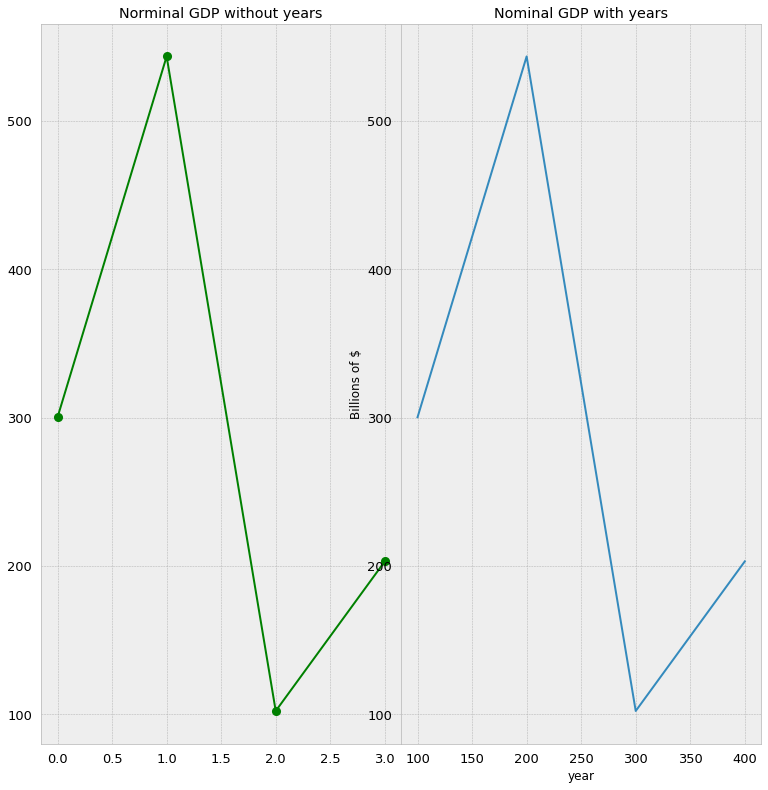

In [30]:
import matplotlib.pyplot as plt


# Set global style
print(plt.style.available)
plt.style.use('bmh')

# Simple Line Graph
years = [100, 200, 300, 400]
gdp = [300.2, 543.3, 102.3, 203.1]

plt.figure(figsize=(10, 10)) # Make empty Coordinate

plt.axes([0., 0., 0.5, 1.]) # [ left, bottom, width, height]
plt.title("Norminal GDP without years")
plt.plot(gdp, color='green', marker='o', linestyle='solid') # One parameter treats as y

plt.axes([0.5, 0., 0.5, 1.])
plt.title("Nominal GDP with years") # Set title
plt.xlabel("year") # Set x-label
plt.ylabel("Billions of $") # Set y-label
plt.plot(years, gdp) # Two parameters treat as x, y

- When saving or showing figures, the state machine of matplotlib determines there are no figures in another cell

In [32]:
# Not drawn

# Save figure
plt.savefig("norminal GDP.pdf")
# Show figure
plt.show() 

[<matplotlib.axis.XTick object at 0x146db2740>, <matplotlib.axis.XTick object at 0x146db2350>, <matplotlib.axis.XTick object at 0x146db2dd0>] [Text(0, 0, 'Annie Hall'), Text(1, 0, 'Ben0Hur'), Text(2, 0, 'casablanca')]


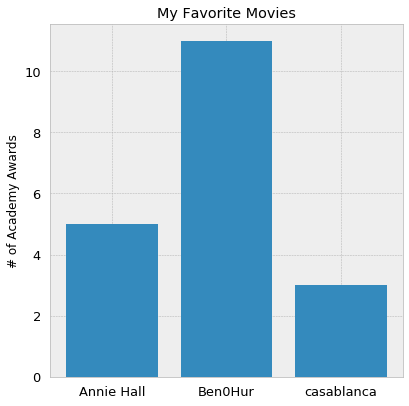

In [44]:
# Bar chart: 이산 항목에 대한 변화량 시각화

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

movies = ["Annie Hall", "Ben0Hur", "casablanca"]
num_oscars = [5, 11, 3]
xs = [i + 0.1 for i, _ in enumerate(movies)] # The default width of bar is 0.8. So, add 0.1 for alignment

plt.bar(movies, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")

locs, labels = plt.xticks([i for i, _ in enumerate(movies)], movies) # Set/Get x-ticks for labeling each x-baseline
print(locs, labels)
plt.show()

- ```plt.axis```는 주의깊게 사용해야 한다.

Text(0.5, 1.0, 'Distribution of Exam 1 Grades with y starting 5')

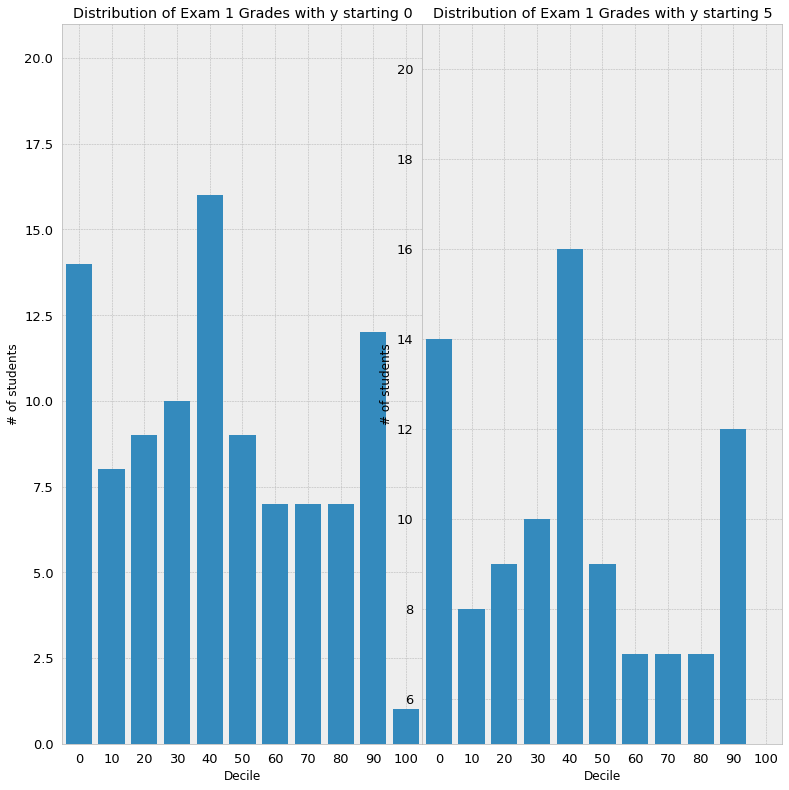

In [64]:
# Histogram by using bar-chart

import random
from collections import Counter
import matplotlib.pyplot as plt

grades = [random.randint(0, 100) for _ in range(100)]
decile = lambda grade: grade // 10 * 10 # The category of grades divided by 10

# To count the number of elements in each categories, Use Counter
histogram = Counter(decile(grade) for grade in grades) 

# Draw
plt.figure(figsize=(10,10))

plt.axes([0,0,0.5,1])
plt.bar([x for x in histogram.keys()], histogram.values(), 8) # x, height, width
plt.axis([-5, 105, 0, max(histogram.values()) + 5]) # Set/Get [xmin, xmax, ymin, ymax]
plt.xticks([i*10 for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("# of students")
plt.title("Distribution of Exam 1 Grades with y starting 0")


plt.axes([0.5,0,0.5,1])
plt.bar([x for x in histogram.keys()], histogram.values(), 8) # x, height, width
plt.axis([-5, 105, 5, max(histogram.values()) + 5]) # Set/Get [xmin, xmax, ymin, ymax]
plt.xticks([i*10 for i in range(11)])
plt.xlabel("Decile")
plt.ylabel("# of students")
plt.title("Distribution of Exam 1 Grades with y starting 5")


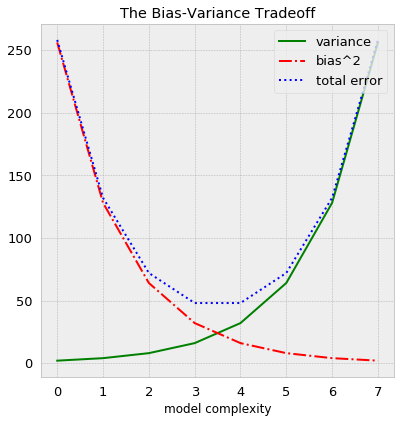

In [70]:
# Line plot : 경향성을 시각화한다

import matplotlib.pyplot as plt

variance = [2**i for i in range(1, 9)]
biasSquared = sorted(variance,reverse=True)

totalError = [x + y for x, y in zip(variance, biasSquared)]
xs = [i for i, _ in enumerate(variance)]

# 한 Figure에 여러 그림을 그릴 수 있다
plt.figure(figsize=(5,5))

# label: 범례를 위한 그래프의 라벨링
plt.plot(xs, variance, 'g-', label='variance') # Green line plot
plt.plot(xs, biasSquared, 'r-.', label='bias^2') # Red dot and line plot
plt.plot(xs, totalError, 'b:', label='total error') # Blue dot plot

plt.legend(loc='upper right')
plt.xlabel("model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

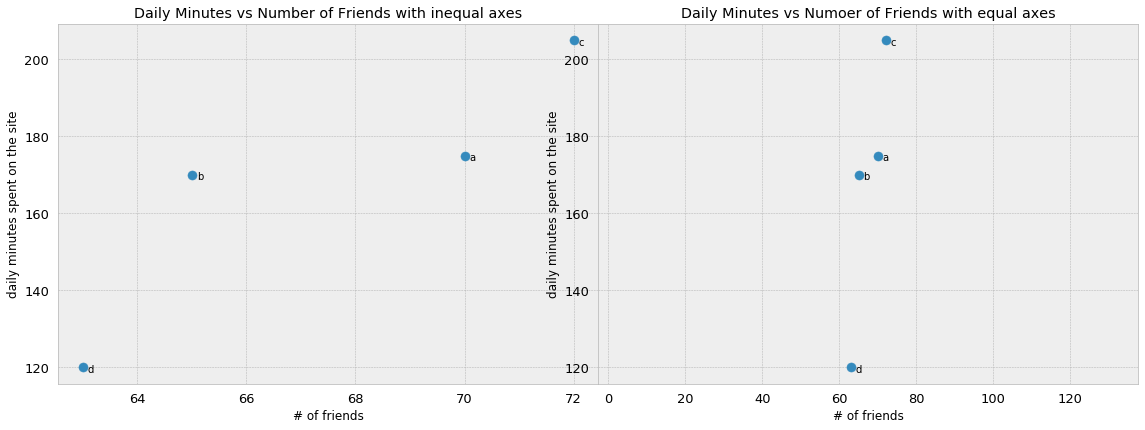

In [80]:
# Scatter plot: 두 변수 간의 연관 관계를 시각화
# 공정한 비교를 위해서는 두 축의 범위를 동일하게 만들어야만 한다

import matplotlib.pyplot as plt

friends = [70,65,72,63]
minutes = [175,170,205,120]
labels = ['a', 'b', 'c', 'd']

plt.figure(figsize=(15,5))

plt.axes((0,0,0.5,1))
plt.scatter(friends, minutes)

# labeling each data
# xy is the location of data point
# xytext is the coordinate of label
# textcoords is the interpretation of "xytext"
for label, friendCount, minuteCount in zip(labels, friends, minutes):
    plt.annotate(label, xy=[friendCount, minuteCount], xytext=(5, -5), textcoords='offset points')

plt.title("Daily Minutes vs Number of Friends with inequal axes")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")


plt.axes((0.5,0,0.5,1))
plt.scatter(friends, minutes)
plt.axis("equal") # Make the axes have the equal range

# labeling each data
# xy is the location of data point
# xytext is the coordinate of label
# textcoords is the interpretation of "xytext"
for label, friendCount, minuteCount in zip(labels, friends, minutes):
    plt.annotate(label, xy=[friendCount, minuteCount], xytext=(5, -5), textcoords='offset points')

plt.title("Daily Minutes vs Numoer of Friends with equal axes")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

## 통계

### 데이터셋 설명하기

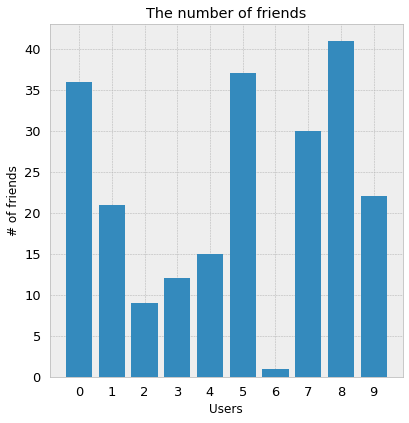

In [87]:
# 사용자들이 몇 명의 친구를 가지는가

import matplotlib.pyplot
import random
from collections import Counter

numFriends = [random.randint(0, 50) for _ in range(10)]

# 데이터가 적다면 그 자체를 보여주는 것이 가장 좋은 방법일 수 있다
plt.figure(figsize=(5,5))
plt.bar([x for x, _ in enumerate(numFriends)], numFriends)
plt.title("The number of friends")
plt.xlabel("Users")
plt.ylabel("# of friends")
plt.xticks([x for x, _ in enumerate(numFriends)], range(10))
plt.show()

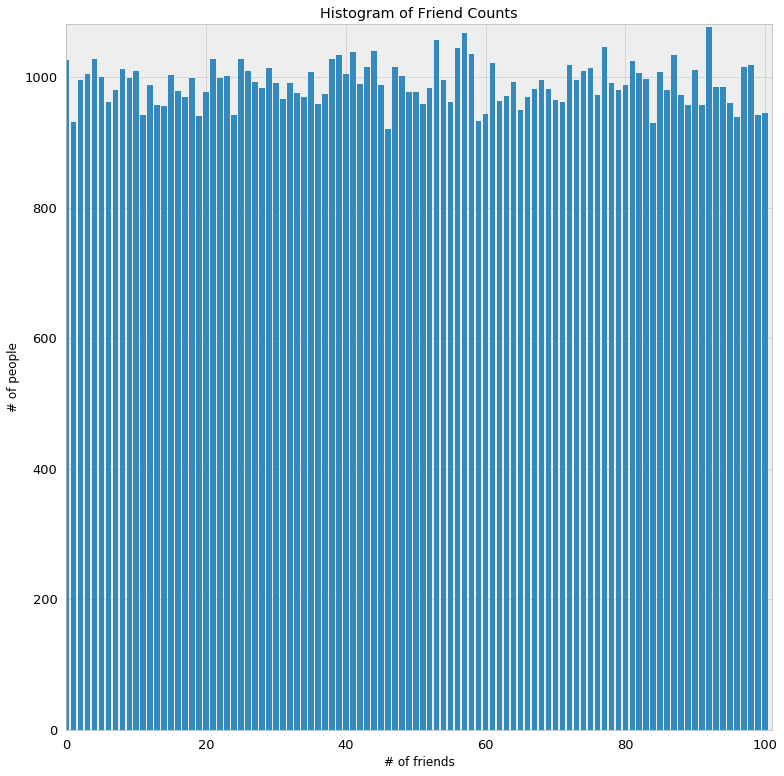

데이터 포인트: 101개
최댓값: 100, 최솟값: 0
평균: 49.9839
중앙값: 50
0.1 quantile 10
0.25 quantile 25
0.75 quantile 75
mode 92


In [135]:
# 데이터가 많다면, 정제해야만 한다

import random
import matplotlib.pyplot as plt
from collections import Counter

friendCount = [random.randint(0, 100) for _ in range(100000)]
friendCount = Counter(friendCount)

# Histogram
xs = range(101) # the number of friends
ys = [friendCount[x] for x in xs] # the number of people having x number of friends

plt.figure(figsize=(10,10))
plt.bar(xs, ys)
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.axis([0, 101, 0, max(friendCount.values())+5])
plt.show() # Still complicated

# 히스토그램의 통계치 계산

# 01. 데이터 포인트 개수, 최댓값 및 최솟값(친구수의)
numPoints = len(friendCount)
largestPoint = max(friendCount)
smallestPoint = min(friendCount)
print("데이터 포인트: {}개".format(numPoints))
print("최댓값: {}, 최솟값: {}".format(largestPoint, smallestPoint))

# 02. 중심경향성(Central Tendency)
## 02-01. Average of friends
### 평균은 이상치에 민감하다
import numpy as np
total = np.sum(np.multiply(list(friendCount.keys()), list(friendCount.values())))
numPeople = np.sum(list(friendCount.values()))
avg = total / numPeople

print("평균:", avg)

## 02-02. Median
median = lambda lst: lst[len(lst) // 2] if len(lst) % 2 else (lst[len(lst) // 2] + lst[len(lst) // 2 + 1]) / 2
print("중앙값:", median(sorted(friendCount.keys())))

## 02-03. Quantile(분위): 특정 백분위 이하의 최댓값
### Median := Quantile(50%)
def quantile(lst, p):
    p_index = int(p * len(lst))
    return sorted(lst)[p_index]

print("0.1 quantile", quantile(friendCount.keys(), 0.1))
print("0.25 quantile", quantile(friendCount.keys(), 0.25))
print("0.75 quantile", quantile(friendCount.keys(), 0.75))

## 02-04. mode(최빈값)
print("mode", friendCount.most_common(n=1)[0][0])

### Dispersion(산포도)
- 데이터가 흩어진 정도 ```Dispersion is proportion to variance```

In [143]:
# 01. Range
## 이상치에 민감하다
def data_range(lst):
    return max(lst) - min(lst)
print("Range", data_range(friendCount.keys()))


import numpy as np

# 02. Variance & Standard Deviation
## 이상치에 민감하다
numFriends = []
for numFriend, people in friendCount.items():
    numFriends.extend([numFriend]*people)

var = np.var(numFriends, ddof=1)
std = np.std(numFriends, ddof=1)
print("Variance", var)
print("Standard Deviation", std)

# 03. Interquartile Range
## 이상치의 영향을 줄인다
## .75 - .25 quartile
def interquartile_range(lst):
    return quantile(lst, .75) - quantile(lst, .25)

print("Interquartile Range", interquartile_range(friendCount.keys()))

Range 100
Variance 847.3676344663447
Standard Deviation 29.109579771380155
Interquartile Range 50


### 상관관계

Covariance 1043.479898989899
Correlation 0.8558862849052392


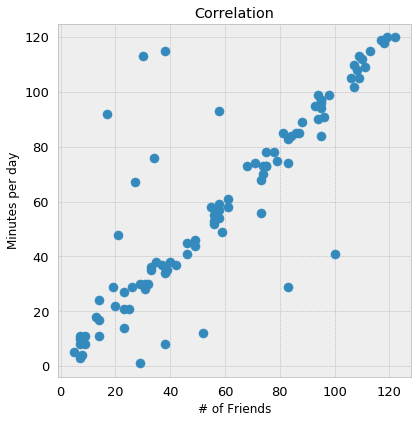

Correlation 0.9966698908189097


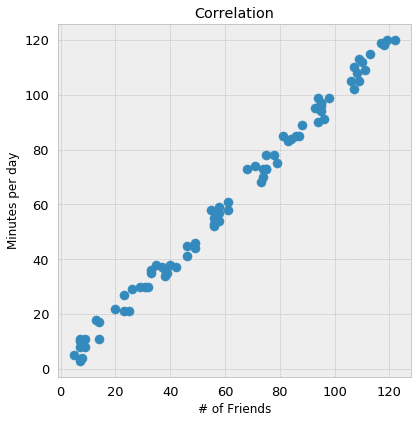

In [167]:
import numpy as np
import random

dailyMinutesList = [random.randint(1, 120) for _ in range(100)]
numFriends = [minute + random.randint(-5, +5) for minute in dailyMinutesList]
# Outlier
for _ in range(10, 30):
    numFriends[_] = random.randint(0, 100)

# Covariance
## 단위 및 값의 범위를 해석하기 어렵다
def cov(x, y):
    def de_mean(lst):
        return np.subtract(lst, np.mean(lst))
    return np.sum(de_mean(x) * de_mean(y)) / (len(x) - 1)
print("Covariance", cov(dailyMinutesList, numFriends))


# Correlation
## 단위 제거 및 [-1, +1] 정규화
def corr(x, y):
    stdX = np.std(x, ddof=1)
    stdY = np.std(y, ddof=1)
    return cov(x, y) / (stdX * stdY)
print("Correlation", corr(dailyMinutesList, numFriends))

## 상관관계 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.axis("equal")
plt.scatter(numFriends, dailyMinutesList)
plt.xlabel("# of Friends")
plt.ylabel("Minutes per day")
plt.title("Correlation")
plt.show()

## Outlier 제거 시 더 나은 상관관계를 보인다
numFriends = [num for _, num in enumerate(numFriends) if _ not in range(10, 30)]
dailyMinutesList = [minute for _, minute in enumerate(dailyMinutesList) if _ not in range(10, 30)]
print("Correlation", corr(dailyMinutesList, numFriends))
plt.figure(figsize=(5,5))
plt.axis("equal")
plt.scatter(numFriends, dailyMinutesList)
plt.xlabel("# of Friends")
plt.ylabel("Minutes per day")
plt.title("Correlation")
plt.show()

### 심슨의 역설
- 혼재 변수(Confounding Variables)가 누락되어 상관관계가 잘못 계산되는 현상

| Region | Users | Avg friends |
| - | - | - |
| West | 101 | 8.2 |
| East | 103 | 6.5 |

But,

| Region | Degree | Users | Avg friends |
| - | - | - | - |
| West | Doctor | 35 | 3.1 |
| East | Doctor | 70 | 3.2 |
| West | Extra | 66 | 10.9 |
| East | Extra | 33 | 13.4 |

- 감춰진 정보인 학위로 인해 상관관계가 반대로 해석될 수 있다
- **상관관계는 다른 모든 것이 동일할 때, 두 변수의 관계를 해석한다**
  - 무작위가 아니라면, 이 가정은 성립되지 않는다
- 심슨의 역설을 해결할 유일한 방법은 데이터를 이해하고 변수에 영향을 주는 모든 요인을 확인하는 것이다

### 상관관계 +
- ```Correlation = 0```은 **선형 관계**가 없다는 사실만 의미한다

Correlation 0.0


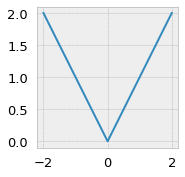

In [170]:
import numpy as np
import matplotlib.pyplot as plt
x = [-2,-1,0,1,2]
y = np.abs(x)

print("Correlation", corr(x, y))
plt.plot(x, y)
plt.show()

## 확률

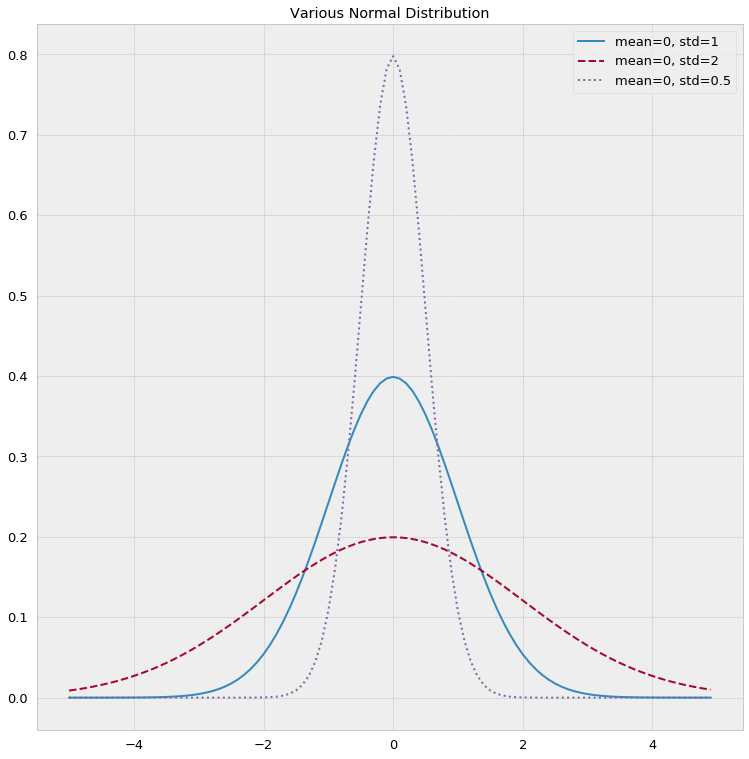

In [175]:
from math import sqrt, exp, pi
import matplotlib.pyplot as plt

def normal_pdf(x, mean, std):
    return (exp(-(x-mean)**2 /(2*std**2))) / (sqrt(2*pi) * std)

plt.figure(figsize=(10,10))
plt.title("Various Normal Distribution")

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, 0, 1) for x in xs], '-', label='mean=0, std=1')
plt.plot(xs, [normal_pdf(x, 0, 2) for x in xs], '--', label='mean=0, std=2')
plt.plot(xs, [normal_pdf(x, 0, 0.5) for x in xs], ':', label='mean=0, std=0.5')
plt.legend(loc='upper right')
plt.show()

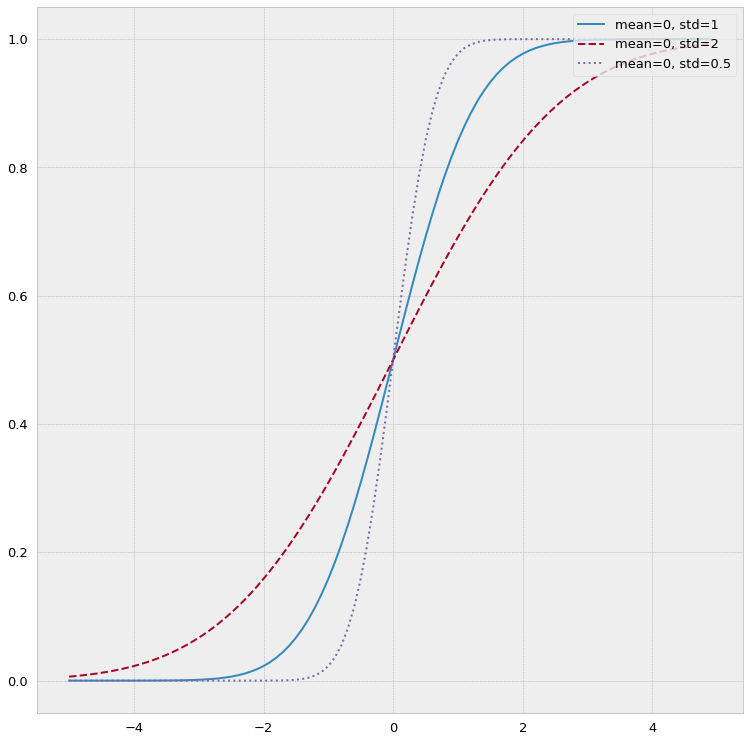

In [187]:
# CDF
from math import erf, sqrt #Error function
def normal_cdf(x, mean, std):
    return (1 + erf((x - mean) / sqrt(2) / std)) / 2

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, 0, 1) for x in xs], '-', label='mean=0, std=1')
plt.plot(xs, [normal_cdf(x, 0, 2) for x in xs], '--', label='mean=0, std=2')
plt.plot(xs, [normal_cdf(x, 0, 0.5) for x in xs], ':', label='mean=0, std=0.5')
plt.legend(loc='upper right')
plt.show()

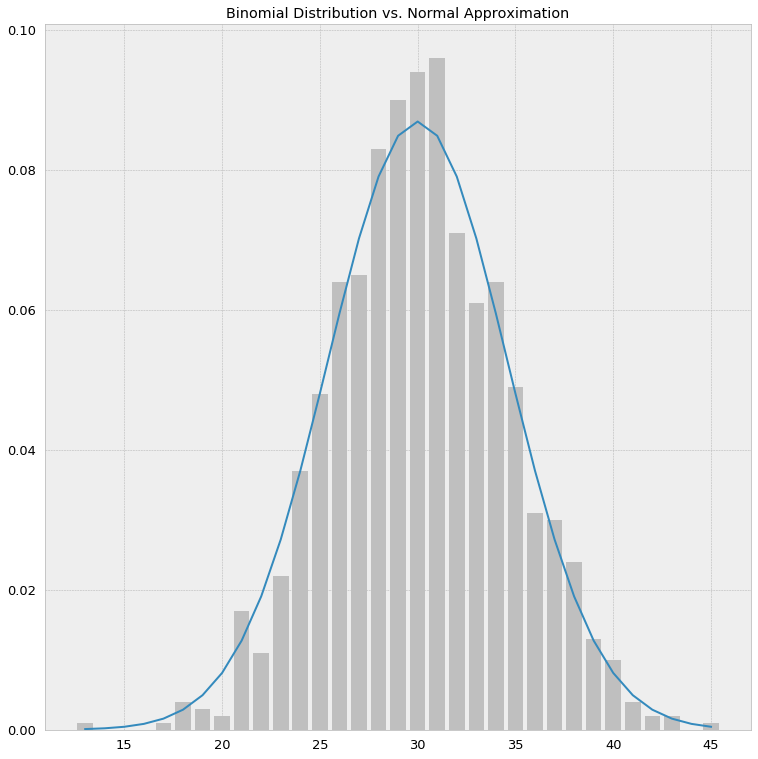

In [191]:
# Central Limit Theorem
## 동일한 분포를 갖는 독립적인 확률변수의 평균은 정규분포를 따르는 확률변수이다

## Binomial Distribution Example
### n개의 독립적인 베르누이 확률변수를 더한 확률변수

import random

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, numPoints):
    data = [binomial(n, p) for _ in range(numPoints)]
    
    histogram = Counter(data)
    plt.bar(histogram.keys(), [v / numPoints for v in histogram.values()], 0.8, color='0.75')
    
    mean = n * p
    std = sqrt(n * p * (1 - p))
    
    xs = [x for x in range(min(data), max(data) + 1)]
    ys = [normal_cdf(x + .5, mean, std) - normal_cdf(x - .5, mean, std) for x in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
plt.figure(figsize=(10,10))
make_hist(.3, 100, 1000)

## 가설과 추론

### Classical Hypothesis Testing

#### Concept
- 귀무가설(Null Hypothesis, H0) := Basic hypothesis
- 대립가설(Alternative Hypothesis, H1) := Compared hypothesis

#### Goal
- Determine whether dropping H0 or not

#### Significance(유의 수준)
- 1종 오류(False Positive)를 얼마나 허용할 것인가
- 5% or 1%로 설정하는 경우가 많다

#### Power(검정력)
- 2종 오류(False Negative)를 범하지 않을 확률
- ```1 - P(range(H0) | H1)```

#### P-value
- ```H0 = True```라는 가정 하에 극단적인 값이 나올 확률을 계산

#### Example - The fair Coin

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp, pi, floor, ceil

# H0 : p = 0.5
# H1 : p != 0.5

def normal_approximation_to_binomial(n, p):
    mean = n*p
    var = n*p*(1-p)
    std = sqrt(var)
    return mean, std

def inverse_normal_distribution(p, mean, std, tolerance=1.0e-5):
    if mean != 0 or std != 1:
        return mean + std*inverse_normal_distribution(p, 0, 1)
    
    loZ, hiZ, midZ = -10, +10, 0
    
    while hiZ - loZ > tolerance:
        midZ = (hiZ + loZ) / 2
        midP = normal_cdf(midZ, mean, std)
        
        if midP < p:
            loZ, hiZ = loZ, midZ
        elif midP > p:
            loZ, hiz = midZ, hiZ
        else:
            break
    return midZ
        
# Based on the hypothesis of normal distribution,
normal_probability_below = normal_cdf
normal_probability_above = lambda x, mean, std: 1 - normal_cdf(x, mean, std)
normal_probability_between = lambda lo, hi, mean, std: normal_cdf(hi, mean, std) - normal_cdf(lo, mean, std)
normal_probability_outside = lambda lo, hi, mean, std: 1 - normal_probability_between(lo, hi, mean, std)
normal_upper_bound = lambda p, mean, std: inverse_normal_distribution(p, mean, std)
normal_lower_bound = lambda p, mean, std: inverse_normal_distribution(1-p, mean, std)

def normal_two_sided_bounds(p, mean, std):
    tailP = (1 - p) / 2
    upperBound = normal_upper_bound(tailP, mean, std)
    lowerBound = normal_lower_bound(tailP, mean, std)
    return floor(lowerBound), ceil(upperBound)

# 가설 검정
n = 10000

mu0, std0 = normal_approximation_to_binomial(n, .5)
## Significance = .5
bounds = normal_two_sided_bounds(.95, mu0, std0)

# 동전 던지기의 시행이 해당 범위를 벗어나면, H0를 기각한다
print(bounds)

lo, hi = bounds
for _ in range(10000):
    x = binomial(n, .5)
    if x not in range(lo, hi + 1):
        print("H0는 기각됨", x)
        break
    else:
        continue

# Power
lo, hi = normal_two_sided_bounds(.95, mu0, std0)
# H1 : p != .5
mu1, std1 = normal_approximation_to_binomial(n, .55) # p = .55

# 2종 오류란 H1이 사실일 때, H1을 기각하지 못할 확률이다. 즉,
type2P = normal_probability_between(lo, hi, mu1, std1) # lo - hi in (mu1, std1)
power = 1 - type2P
print("H1: p != .5 (p = .55)의 검정력", power)

# H0: p <= .5 라면 더 나은 검정력을 얻을 수 있다
hi = normal_upper_bound(.95, mu0, std0)
type2P = normal_probability_below(hi, mu1, std1)
power = 1 - type2P
print("H1: p > .5의 검정력", power)

# 검정력에 따른 H0 기각 여부
if power < .9:
    print("2종 오류에 따라 H0는 기각된다")

# P-value Test
def two_sided_p_value(x, mean, std):
    if x >= mean:
        # P(X > mean) 이 tail이다
        return normal_probability_above(x, mean, std)
    else:
        # P(X < mean) 이 tail이다
        return normal_probability_below(x, mean, std)

# X의 실제 값
x = 5299.5 # By Continuity Correction
pValue = two_sided_p_value(x, mu0, std0) # H0 = True 가정
print("pValue(X>=530)", pValue) #pValue: X >= 530인 확률

# Simulation
extreamValueCount = 0
for _ in range(10**4):
    if binomial(n, .5) >= 5300:
        extreamValueCount += 1
print("Simulation", extreamValueCount/(10**4))

# P-value에 따른 H0 기각 여부
if pValue < .1: # 유의수준 1%에 따른 기각 여부
    print("pValue에 따라 H0를 기각한다") # 실제 값이 분포 상에서 등장할 확률이 1% 미만이므로, 해당 가설 H0는 잘못되었다 판단한다
    




(4500, 5500)
H1: p != .5 (p = .55)의 검정력 0.5
H1: p > .5의 검정력 1.0
pValue(X>=530) 1.049205167191758e-09
Simulation 0.0
pValue에 따라 H0를 기각한다
